In [18]:
from pinnsform.util import *
from pinnsform.model import PINN, FLS, FLW, PINNsformer
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def load_csv_to_numpy(file_path):
    df = pd.read_csv(file_path, header=None, index_col=None, sep=",")
    return np.array(df.values)

In [35]:
def plot_evolution(
    value_evolution,
    evolution_label,
    title="Training loss evolution",
    xlabel="# epochs",
    ylabel="loss",
    linestyle='solid',
):
    fig, ax = plt.subplots()
    if isinstance(evolution_label, list):
        if len(value_evolution) != len(evolution_label):
            raise ValueError("The number of value evolutions and labels must match.")
        for i, evo in enumerate(value_evolution):
            ax.semilogy(evo, label=evolution_label[i], linestyle=linestyle)
    else:
        ax.semilogy(value_evolution, label=evolution_label)
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05))
    ax.legend()

In [36]:
base_dir = os.getcwd()
experiment_name = "PINNFORMER_TS"
data51_path = os.path.join(base_dir, 'results', experiment_name, '51mesh')
data101_path = os.path.join(base_dir, 'results', experiment_name, '101mesh')
data51_sine_path = os.path.join(base_dir, 'results', experiment_name, '51mesh_sine')
data51rts_path = os.path.join(base_dir, 'results', "PINNFORMER_RTS", "20240917_122008")
data51degen_path = os.path.join(base_dir, 'results', "PINNFORMER_DEGEN_TS", "20240919_155755")
data51tanh_path = os.path.join(base_dir, 'results', experiment_name, '51mesh_tanh')

In [37]:
adam_pinnsformer_path = os.path.join(base_dir, 'results', "Adam_PINNFORMER_TS", '20240926_133454')

In [54]:
train_data_path = os.path.join(adam_pinnsformer_path, "seed_1", "train_data.csv")

In [58]:
train_data = load_csv_to_numpy(train_data_path).T
#plot_evolution([train_data[]train_data[0]
train_loss = train_data[0,1:].astype(float) + train_data[1,1:].astype(float) + train_data[2,1:].astype(float)

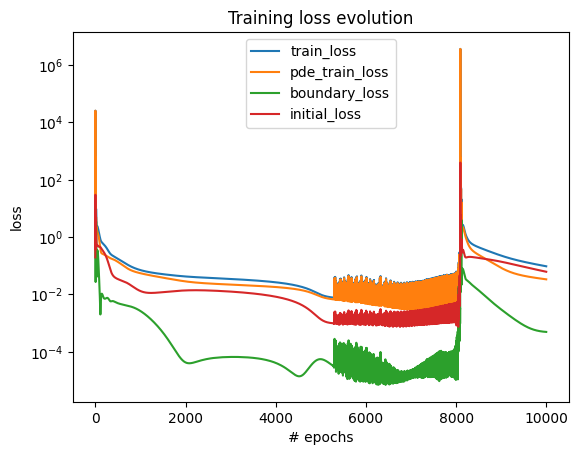

In [65]:
plot_evolution([train_loss, train_data[0,1:].astype(float), train_data[1,1:].astype(float), train_data[2,1:].astype(float)], ["train_loss"]+list(train_data.T[0,:3]))

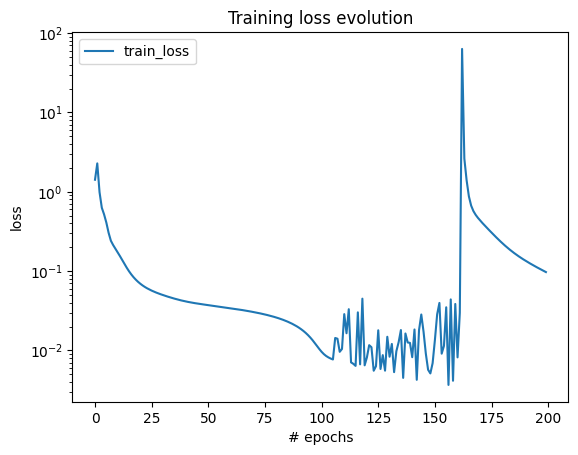

In [67]:
plot_evolution([train_loss[::50]], ["train_loss"])

In [49]:
train_data[0,1:]

array(['1566.5003662109375', '259313.484375', '15.604938507080078', ...,
       '0.00019818346481770277', '0.00021661684149876237',
       '0.00019971733854617923'], dtype=object)

In [3]:
def histogram(data, title = "Distribution of First Entry Values"):
    plt.figure(figsize=(8, 6))
    # Create a histogram
    plt.hist(data, bins=20, edgecolor='black')
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)

    # Display the plot
    plt.show()

In [4]:
NUM_SEEDS = 100
INIT_SEEDS = np.array(range(NUM_SEEDS))
#MODELS = ["PINN", "FLS", "FLW"]

In [5]:
def load_full_data(data_path):
    data = np.zeros((100, 2))
    for i in INIT_SEEDS:
        seed_path = os.path.join(data_path, f"seed_{i}", "error.csv")
        dat = load_csv_to_numpy(seed_path)
        data[i] = dat[1,:]
    return data

In [8]:
data51_pinnsformers = load_full_data(data51_path)
data101_pinnsformers = load_full_data(data101_path)
data51rts_pinnsformers = load_full_data(data51rts_path)
data51degen_pinnsformers = load_full_data(data51degen_path)
data51_sine_pinnsformers = load_full_data(data51_sine_path)
data51_tanh_pinnsformers = load_full_data(data51tanh_path)

In [9]:
print("51x51 ts pinnsformers")
print(np.mean(data51_pinnsformers, axis=0))
print("101x101 ts pinnsformers")
print(np.mean(data101_pinnsformers, axis=0))
print("51x51 rts pinnsformers")
print(np.mean(data51rts_pinnsformers, axis=0))
print("51x51 ts pinnsformers degen")
print(np.mean(data51degen_pinnsformers, axis=0))
print("51x51 ts pinnsformers sine")
print(np.mean(data51_sine_pinnsformers, axis=0))
print("51x51 ts pinnsformers tanh")
print(np.mean(data51_tanh_pinnsformers, axis=0))

51x51 ts pinnsformers
[0.10259024 0.13756703]
101x101 ts pinnsformers
[0.10991545 0.14602731]
51x51 rts pinnsformers
[0.06438724 0.09680841]
51x51 ts pinnsformers degen
[0.14778345 0.17932631]
51x51 ts pinnsformers sine
[0.09233117 0.14063383]
51x51 ts pinnsformers tanh
[0.34949976 0.3857443 ]


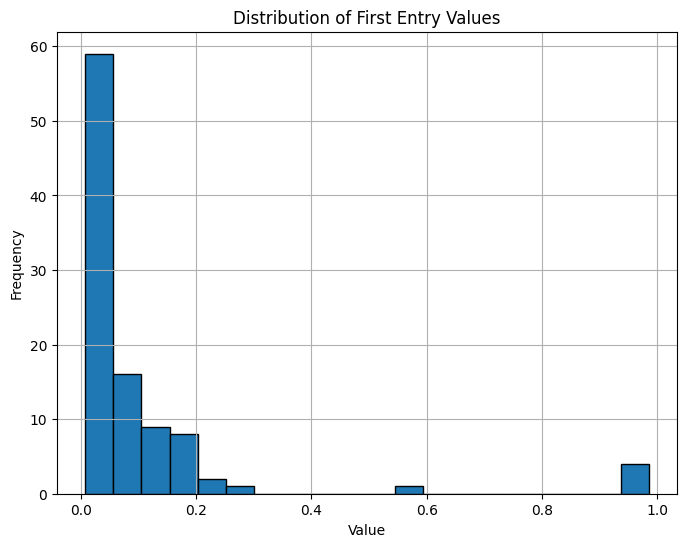

In [12]:
histogram(data51_pinnsformers[:,0])

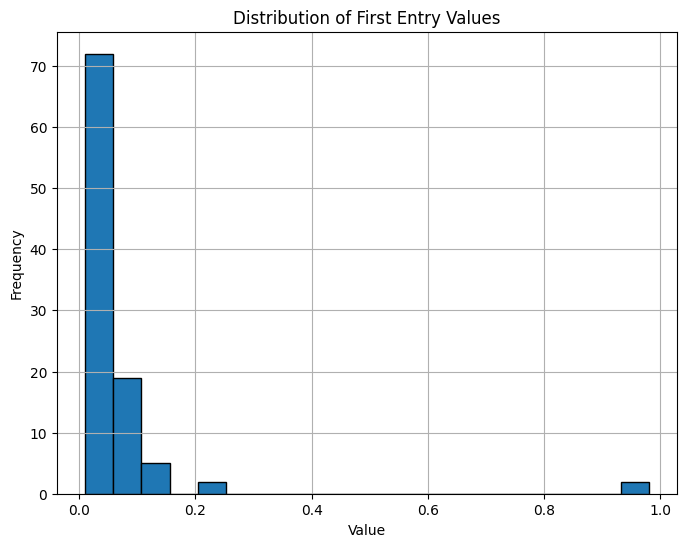

In [13]:
histogram(data51rts_pinnsformers[:,0])

In [ ]:
histogram(data51_pinnsformers[:,0])

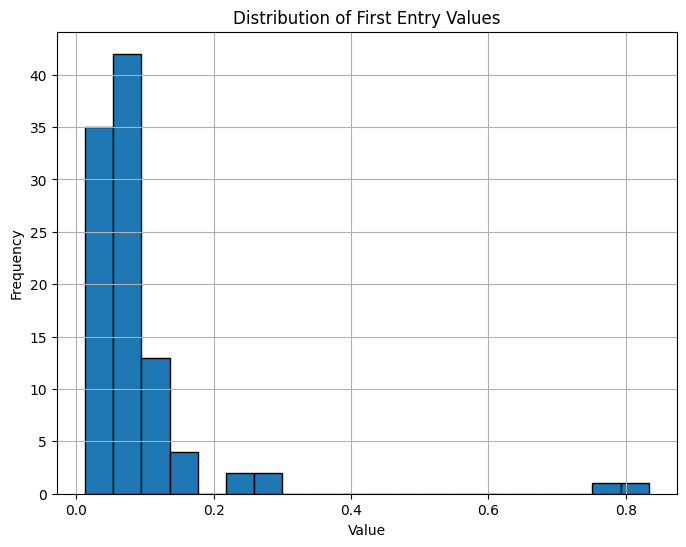

In [11]:
histogram(data51_sine_pinnsformers[:,0])

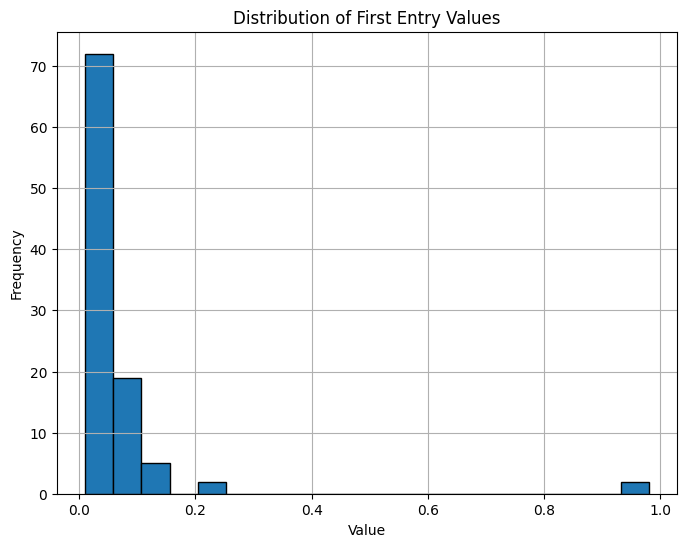

In [9]:
histogram(data51rts_pinnsformers[:,0])

In [5]:
def all_wavelet_weights(data_path):
    wavelet_weights = {}
    for seed in INIT_SEEDS:
        model_path = os.path.join(data_path, f"seed_{seed}", "trained_model.pth")
        model = PINNsformer(d_out=1, d_hidden=512, d_model=32, N=1, heads=2)
        model.load_state_dict(torch.load(model_path))
        for name, data in model.named_parameters():
            if name.endswith('w1') or name.endswith('w2'):
                if not name in wavelet_weights:
                    wavelet_weights[name] = []
                wavelet_weights[name].append(data[0].item())
    return wavelet_weights

In [26]:
for name in wavelet_weights:
    print(name)
    print(f"{np.mean(wavelet_weights[name])}\t\t{np.std(wavelet_weights[name])}")
    #histogram(wavelet_weights[name], name)

encoder.layers.0.ff.linear.1.w1
1.0013752579689026		0.03525886767755533
encoder.layers.0.ff.linear.1.w2
0.9893266892433167		0.026131724059194637
encoder.layers.0.ff.linear.3.w1
0.9898945266008377		0.03378781396225931
encoder.layers.0.ff.linear.3.w2
0.9902583038806916		0.031224051358904405
encoder.layers.0.act1.w1
0.9995890295505524		0.023473505533612347
encoder.layers.0.act1.w2
1.000620943903923		0.022087991947514755
encoder.layers.0.act2.w1
1.0022093904018403		0.024183937624743468
encoder.layers.0.act2.w2
1.0035905969142913		0.021430642668839563
encoder.act.w1
1.01498309135437		0.014694740350220123
encoder.act.w2
1.0170816642045974		0.016938528080246096
decoder.layers.0.ff.linear.1.w1
1.021456341147423		0.022890068536872477
decoder.layers.0.ff.linear.1.w2
0.9989278638362884		0.023055447740601375
decoder.layers.0.ff.linear.3.w1
1.007587604522705		0.016204281884922594
decoder.layers.0.ff.linear.3.w2
1.0075578474998474		0.017813706989194655
decoder.layers.0.act1.w1
1.0000408756732941		0.

In [6]:
wavelet_weights_51rts = all_wavelet_weights(data51rts_path)

In [7]:
for name in wavelet_weights_51rts:
    print(name)
    print(f"{np.mean(wavelet_weights_51rts[name])}\t\t{np.std(wavelet_weights_51rts[name])}")
    #histogram(wavelet_weights[name], name)

encoder.layers.0.ff.linear.1.w1
1.0113227838277816		0.024146782958718995
encoder.layers.0.ff.linear.1.w2
0.9917566561698914		0.023195893486924652
encoder.layers.0.ff.linear.3.w1
0.9993227738142013		0.02150086994556316
encoder.layers.0.ff.linear.3.w2
0.9973716938495636		0.020529993784551403
encoder.layers.0.act1.w1
1.005831753015518		0.01722065372591945
encoder.layers.0.act1.w2
1.0067613375186921		0.01782619964652617
encoder.layers.0.act2.w1
1.011417773962021		0.01763662819768982
encoder.layers.0.act2.w2
1.0098509562015534		0.016636735405459936
encoder.act.w1
1.0212159270048142		0.018176975368798292
encoder.act.w2
1.022028067111969		0.016408573481031162
decoder.layers.0.ff.linear.1.w1
1.0174154156446458		0.020709886429933384
decoder.layers.0.ff.linear.1.w2
0.9987957066297531		0.02409860398201484
decoder.layers.0.ff.linear.3.w1
1.0034679365158081		0.015514842751005602
decoder.layers.0.ff.linear.3.w2
1.005185031890869		0.01835356765227956
decoder.layers.0.act1.w1
1.000001460313797		7.8962